In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skillsnetwork
import warnings
warnings.filterwarnings('ignore')

In [2]:
#you will need to download the dataset; if you are running locally, please comment out the following 
await skillsnetwork.download_dataset('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv')

Saved as 'automobileEDA.csv'


In [3]:
df = pd.read_csv("automobileEDA.csv", header=0)

In [4]:
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [19]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

In [22]:
X = df[['highway-mpg']]
y = df['price']

In [23]:
lm.fit(X, y);

In [24]:
yhat = lm.predict(X)
yhat[:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [25]:
lm.intercept_

38423.305858157386

In [26]:
lm.coef_

array([-821.73337832])

In [27]:
lm1 = LinearRegression()

In [29]:
X = df[["engine-size"]]
y = df[["price"]]

lm1.fit(X, y)

LinearRegression()

In [31]:
lm1.intercept_, lm1.coef_

(array([-7963.33890628]), array([[166.86001569]]))

In [32]:
# using X and Y  
Yhat=-7963.34 + 166.86*X

Price=-7963.34 + 166.86*df['engine-size']

In [33]:
import seaborn as sns
%matplotlib inline 

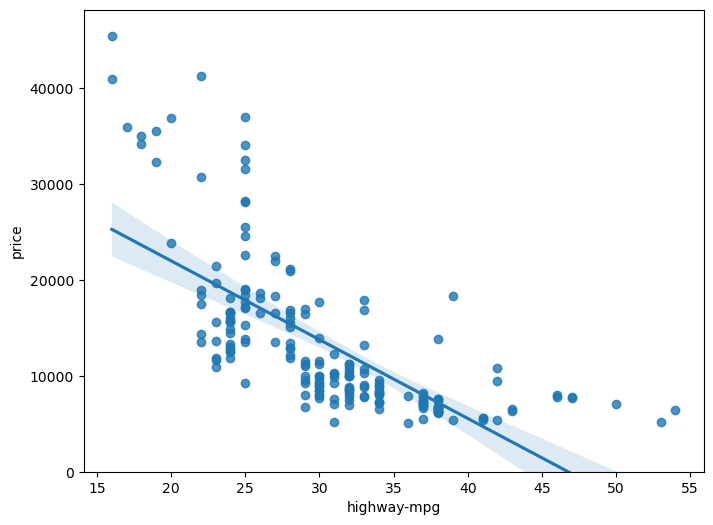

In [38]:
width = 8
height = 6
plt.figure(figsize=(width, height))
sns.regplot(x="highway-mpg", y="price", data=df)
plt.ylim(0,)
plt.show()

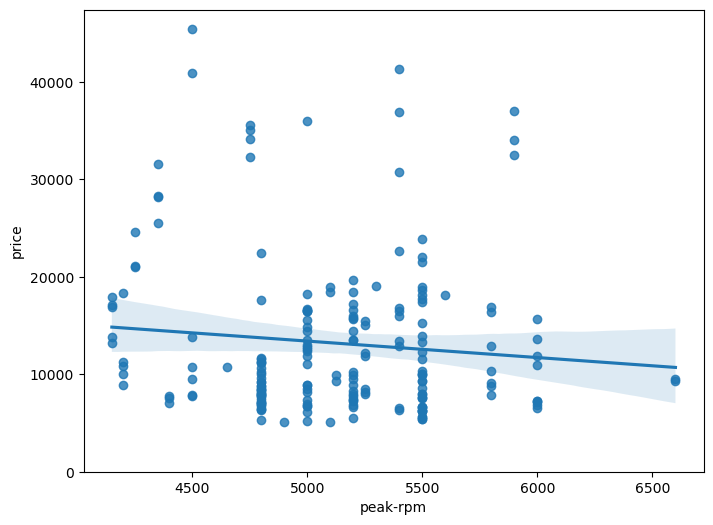

In [41]:
plt.figure(figsize=(width, height))
sns.regplot(x="peak-rpm", y="price", data=df)
plt.ylim(0,)
plt.show()

In [42]:

df[["peak-rpm","highway-mpg","price"]].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


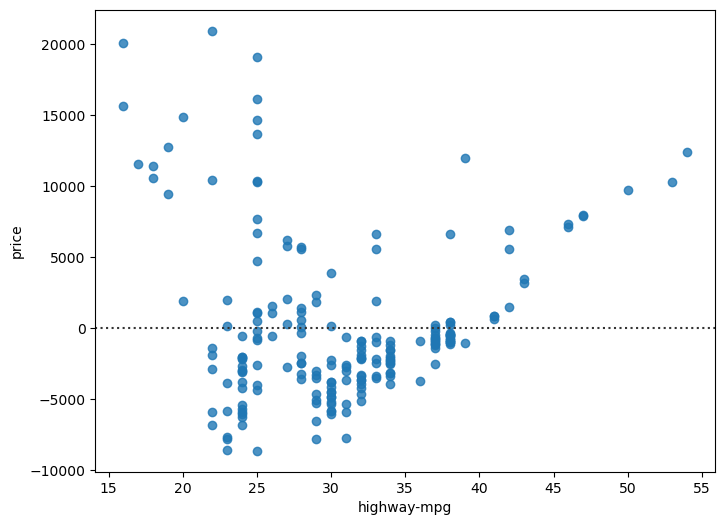

In [43]:
plt.figure(figsize=(width, height))
sns.residplot(x=df['highway-mpg'],y=df['price'])
plt.show()

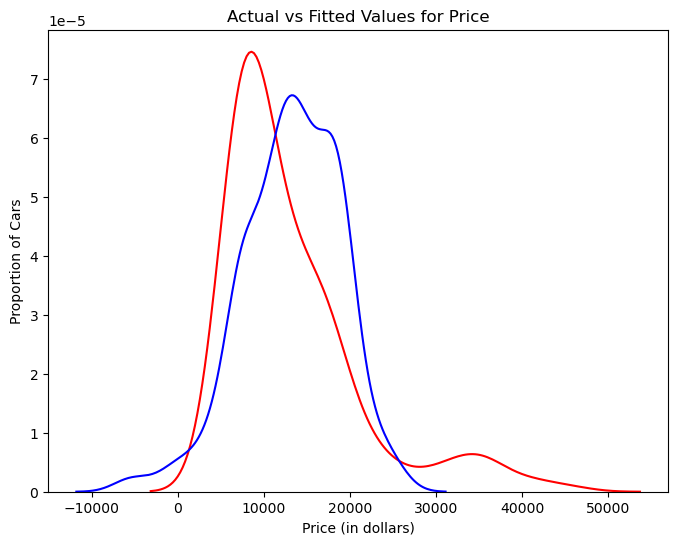

In [78]:
plt.figure(figsize=(width, height))


ax1 = sns.distplot(df['price'], hist=False, color="r", label="Actual Value")
sns.distplot(yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

In [60]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [61]:
x = df['highway-mpg']
y = df['price']

In [62]:
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


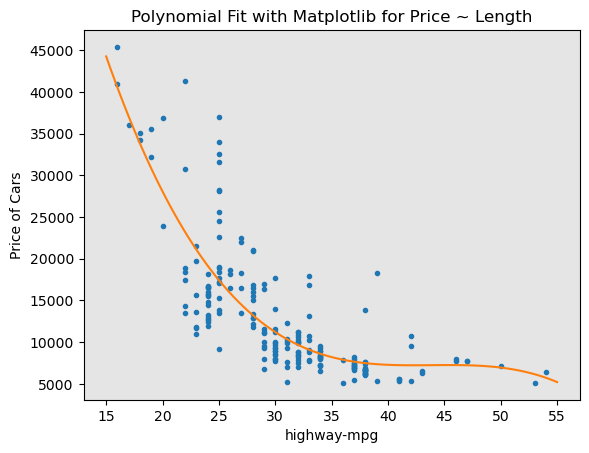

In [63]:
PlotPolly(p, x, y, 'highway-mpg')

In [64]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


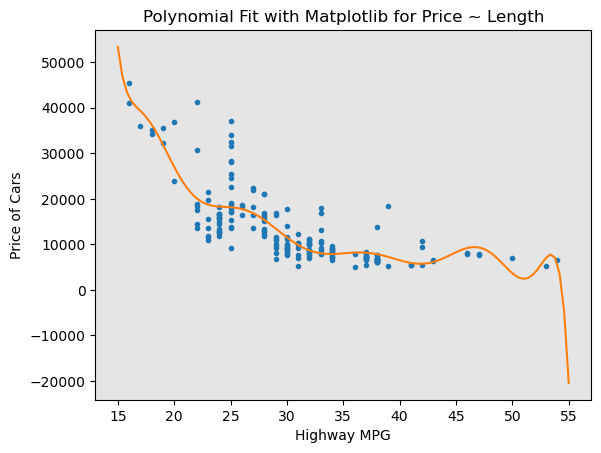

In [67]:
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)
PlotPolly(p1, x, y, 'Highway MPG')

In [65]:
np.polyfit(x, y, 11)

array([-1.24263280e-08,  4.72184468e-06, -8.02842754e-04,  8.05639565e-02,
       -5.29740489e+00,  2.39470103e+02, -7.58845012e+03,  1.68447089e+05,
       -2.56530896e+06,  2.55140360e+07, -1.49106807e+08,  3.87929664e+08])

In [69]:
from sklearn.preprocessing import PolynomialFeatures
pr = PolynomialFeatures(degree=2)

In [74]:
Z_pr = pr.fit_transform(Z)

In [75]:
Z_pr.shape

(201, 6)

In [79]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]
pipe=Pipeline(Input)

In [80]:
Z = Z.astype(float)
pipe.fit(Z,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [81]:
ypipe=pipe.predict(Z)
ypipe[0:4]

array([14342.5344332 , 14342.5344332 , 19304.26010666, 11616.36522368])

In [83]:
#highway_mpg_fit
lm.fit(X, y)
# Find the R^2
print('The R-square is: ', lm.score(X, y))

The R-square is:  0.7609686443622008


In [85]:
# Y_predict_multifit = lm.predict(Z)

In [86]:
from sklearn.metrics import r2_score

In [87]:
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.6741946663906513


In [89]:
from sklearn.metrics import mean_squared_error
mean_squared_error(df['price'], p(x))

20474146.42636125

In [90]:
new_input=np.arange(1, 100, 1).reshape(-1, 1)

In [91]:
lm.fit(X, Y)

LinearRegression()

In [94]:
yhat=lm.predict(new_input)
yhat

array([-7796.47889059, -7629.6188749 , -7462.75885921, -7295.89884352,
       -7129.03882782, -6962.17881213, -6795.31879644, -6628.45878075,
       -6461.59876506, -6294.73874937, -6127.87873368, -5961.01871798,
       -5794.15870229, -5627.2986866 , -5460.43867091, -5293.57865522,
       -5126.71863953, -4959.85862384, -4792.99860814, -4626.13859245,
       -4459.27857676, -4292.41856107, -4125.55854538, -3958.69852969,
       -3791.838514  , -3624.9784983 , -3458.11848261, -3291.25846692,
       -3124.39845123, -2957.53843554, -2790.67841985, -2623.81840416,
       -2456.95838846, -2290.09837277, -2123.23835708, -1956.37834139,
       -1789.5183257 , -1622.65831001, -1455.79829432, -1288.93827862,
       -1122.07826293,  -955.21824724,  -788.35823155,  -621.49821586,
        -454.63820017,  -287.77818448,  -120.91816878,    45.94184691,
         212.8018626 ,   379.66187829,   546.52189398,   713.38190967,
         880.24192536,  1047.10194106,  1213.96195675,  1380.82197244,
      

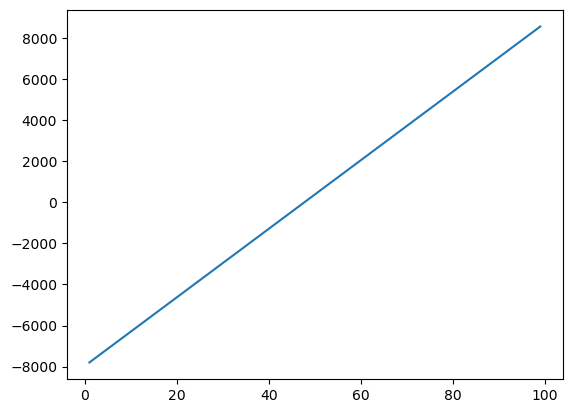

In [93]:
plt.plot(new_input, yhat)
plt.show()